In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [8]:
df= pd.read_csv('C:/Users/Renuka/Desktop/jupiter_lab/env/Scripts/matplitlib/cars.csv')
#head function is used to print the first five records
df.head()

,Model,Actual_MPG,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Year,Origin
0,amc ambassador dpl,15.0,8,390.0,190,3850,8.5,70,American
1,amc gremlin,21.0,6,199.0,90,2648,15.0,70,American
2,amc hornet,18.0,6,199.0,97,2774,15.5,70,American
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,American
4,buick estate wagon (sw),14.0,8,455.0,225,3086,10.0,70,American


In [9]:
# tail function is used to print the first five records
df.tail()

,Model,Actual_MPG,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Year,Origin
387,mazda glc custom,31.0,4,91.0,68,1970,17.6,82,Japanese
388,mazda glc custom l,37.0,4,91.0,68,2025,18.2,82,Japanese
389,nissan stanza xe,36.0,4,120.0,88,2160,14.5,82,Japanese
390,toyota celica gt,32.0,4,144.0,96,2665,13.9,82,Japanese
391,toyota corolla,34.0,4,108.0,70,2245,16.9,82,Japanese


In [10]:
# Let's start with data analysis and pre processing
#shape checks the rows and columns of the data , we have 891 rows and 12 columns in our dataset
df.shape

(392, 9)

In [11]:
#dtypes check the data types of our features
df.dtypes

Model           object
Actual_MPG     float64
Cylinders        int64
Engine_Disp    float64
Horsepower       int64
Weight           int64
Accelerate     float64
Year             int64
Origin          object
dtype: object

In [13]:
#here we are checking the total null values in our features
df.isnull().sum()

Model          0
Actual_MPG     0
Cylinders      0
Engine_Disp    0
Horsepower     0
Weight         0
Accelerate     0
Year           0
Origin         0
dtype: int64

<AxesSubplot:>

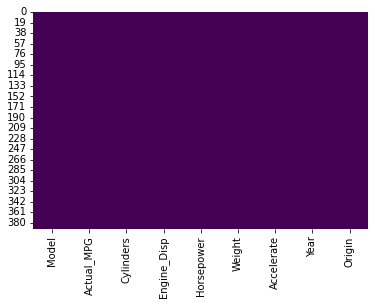

In [15]:
# conclution there is no nul valus in the data set 
#visualizing the null values in the dataset
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
# the below  plot show the proff that the data is set has no null value in it 

In [25]:
# to show cae the persentage of nul value in every col of the data base 
print('Actual_MPG:',df.Actual_MPG	.isnull().sum()/len(df)*100)
print('Cylinders:',df.Cylinders.isnull().sum()/len(df)*100)
print('Engine_Disp:',df.Engine_Disp.isnull().sum()/len(df)*100)
print('Horsepower:',df.Horsepower.isnull().sum()/len(df)*100)
print('Weight:',df.Weight.isnull().sum()/len(df)*100)
print('Accelerate:',df.Accelerate.isnull().sum()/len(df)*100)
print('Year:',df.Year	.isnull().sum()/len(df)*100)
print('Origin:',df.Origin.isnull().sum()/len(df)*100)

Actual_MPG: 0.0
Cylinders: 0.0
Engine_Disp: 0.0
Horsepower: 0.0
Weight: 0.0
Accelerate: 0.0
Year: 0.0
Origin: 0.0


C:\Users\Renuka\Desktop\jupiter_lab\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Horsepower', ylabel='Density'>

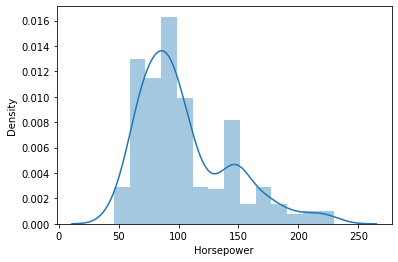

In [48]:
#let's check the distribution of Age feature
sns.distplot(df['Horsepower'],hist=True)

In [49]:
df['Horsepower'].mean()

104.46938775510205

In [50]:
#Age feature is not highly skewed so we will impute missing values with mean

df['Horsepower_mean']=df['Horsepower'].fillna(df['Horsepower'].mean())
df.head()

,Model,Actual_MPG,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Year,Origin,Cylinders_mean,Horsepower_mean
0,amc ambassador dpl,15.0,8,390.0,190,3850,8.5,70,American,8,190
1,amc gremlin,21.0,6,199.0,90,2648,15.0,70,American,6,90
2,amc hornet,18.0,6,199.0,97,2774,15.5,70,American,6,97
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,American,8,150
4,buick estate wagon (sw),14.0,8,455.0,225,3086,10.0,70,American,8,225


In [51]:
df.columns

Index(['Model', 'Actual_MPG', 'Cylinders', 'Engine_Disp', 'Horsepower',
       'Weight', 'Accelerate', 'Year', 'Origin', 'Cylinders_mean',
       'Horsepower_mean'],
      dtype='object')

In [52]:
# Dropping the unnecessary features
data=df.drop(['Origin','Year'],axis=1)
data.head()

,Model,Actual_MPG,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Cylinders_mean,Horsepower_mean
0,amc ambassador dpl,15.0,8,390.0,190,3850,8.5,8,190
1,amc gremlin,21.0,6,199.0,90,2648,15.0,6,90
2,amc hornet,18.0,6,199.0,97,2774,15.5,6,97
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,8,150
4,buick estate wagon (sw),14.0,8,455.0,225,3086,10.0,8,225


<AxesSubplot:ylabel='Horsepower'>

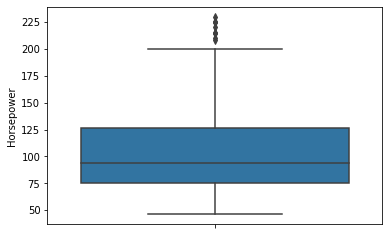

In [53]:
# Treating outliers
#outliers in Horsepower
sns.boxplot(y = df.Horsepower)

In [54]:
# Removing outliers
# Treating outliers
IQR=data['Horsepower_mean'].quantile(0.75)-data['Horsepower_mean'].quantile(0.25)

In [55]:
lower_bridge=data['Horsepower_mean'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['Horsepower_mean'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-1.5
202.5


In [56]:
lower_bridge=data['Horsepower_mean'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['Horsepower_mean'].quantile(0.95)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-1.5
256.5


In [61]:
#business intuition
# for floor, use 5th percentile
# for cap, use 99th percentile

floor1 = data['Horsepower_mean'].quantile(0.05)
cap1 = data['Horsepower_mean'].quantile(0.99)

print(floor1)
print(cap1)

60.55
220.44999999999987


<AxesSubplot:ylabel='Accelerate'>

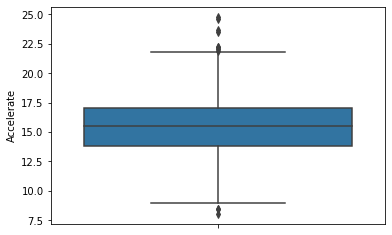

In [62]:
sns.boxplot(y = data.Accelerate)

In [63]:
#statistical way for fare
IQR=data['Accelerate'].quantile(0.75)-data['Accelerate'].quantile(0.25)

lower_bridge=data['Accelerate'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['Accelerate'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

8.900000000000002
21.899999999999995


In [64]:
#statistical way for fare
IQR=data['Accelerate'].quantile(0.75)-data['Accelerate'].quantile(0.25)

lower_bridge=data['Accelerate'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['Accelerate'].quantile(0.95)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

8.900000000000002
25.109999999999992


In [65]:
data['Accelerate'].min()

8.0

In [66]:
data.describe()

,Actual_MPG,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Cylinders_mean,Horsepower_mean
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,5.471939,104.469388
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,1.705783,38.491160
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,3.000000,46.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,4.000000,75.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,4.000000,93.500000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,8.000000,126.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,8.000000,230.000000


In [67]:
data[data['Accelerate']==0].shape

(0, 9)

In [68]:
data[data['Accelerate']==0].describe()

,Actual_MPG,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Cylinders_mean,Horsepower_mean
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
data[data['Accelerate']>=146.71355].count()/data.shape[0]

Model              0.0
Actual_MPG         0.0
Cylinders          0.0
Engine_Disp        0.0
Horsepower         0.0
Weight             0.0
Accelerate         0.0
Cylinders_mean     0.0
Horsepower_mean    0.0
dtype: float64

In [70]:
data = data[data['Accelerate']<=146.71355]

In [73]:
#business intuition for fare
# for floor, use 5th percentile
# for cap, use 95th percentile

floor1 = data['Accelerate'].quantile(0.05)
cap1 = data['Accelerate'].quantile(0.95)

print(floor1)
print(cap1)

11.255
20.234999999999996


In [76]:
data.loc[data['Accelerate']>112, 'Accelerate'] = 112
data.loc[data['Accelerate']<7,'Accelerate'] =7

In [77]:
# Data Analysis
data.describe()

,Actual_MPG,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Cylinders_mean,Horsepower_mean,fare
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,0.0
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,5.471939,104.469388,NaN
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,1.705783,38.491160,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,3.000000,46.000000,NaN
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,4.000000,75.000000,NaN
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,4.000000,93.500000,NaN
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,8.000000,126.000000,NaN
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,8.000000,230.000000,NaN


In [78]:
#to include categorical variable also
data.describe(include='all')

,Model,Actual_MPG,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Cylinders_mean,Horsepower_mean,fare
count,392,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,0.0
unique,301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,amc matador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,5.471939,104.469388,NaN
std,NaN,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,1.705783,38.491160,NaN
min,NaN,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,3.000000,46.000000,NaN
25%,NaN,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,4.000000,75.000000,NaN
50%,NaN,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,4.000000,93.500000,NaN
75%,NaN,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,8.000000,126.000000,NaN


In [81]:
data.groupby('Horsepower')['Accelerate'].count()

Horsepower
46     2
48     3
49     1
52     4
53     2
      ..
210    1
215    3
220    1
225    3
230    1
Name: Accelerate, Length: 93, dtype: int64

<AxesSubplot:xlabel='Model', ylabel='count'>

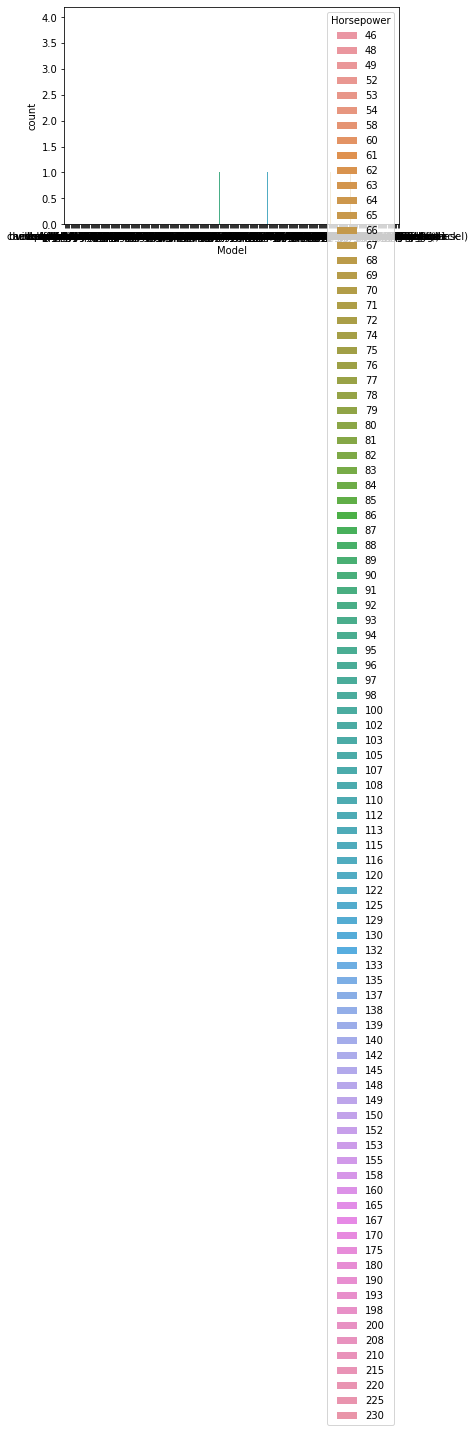

In [88]:
sns.countplot(x='Model',data=data,hue='Horsepower')

In [86]:
data.corr()

,Actual_MPG,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Cylinders_mean,Horsepower_mean,fare
Actual_MPG,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.777618,-0.778427,NaN
Cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,1.000000,0.842983,NaN
Engine_Disp,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.950823,0.897257,NaN
Horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.842983,1.000000,NaN
Weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.897527,0.864538,NaN
Accelerate,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.504683,-0.689196,NaN
Cylinders_mean,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,1.000000,0.842983,NaN
Horsepower_mean,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.842983,1.000000,NaN
fare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

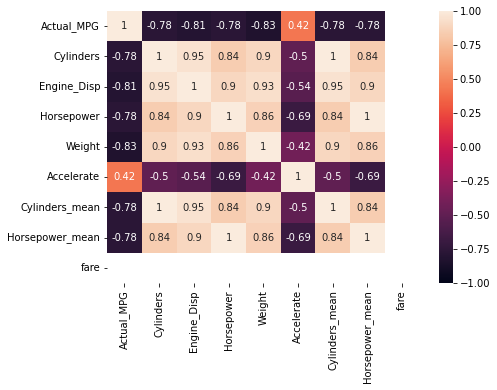

In [87]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(),annot=True,vmin=-1)

C:\Users\Renuka\Desktop\jupiter_lab\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Horsepower', ylabel='count'>

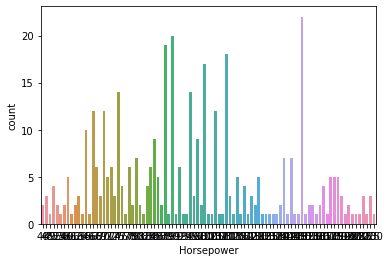

In [89]:
 sns.countplot('Horsepower',data=data)

C:\Users\Renuka\Desktop\jupiter_lab\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Actual_MPG', ylabel='count'>

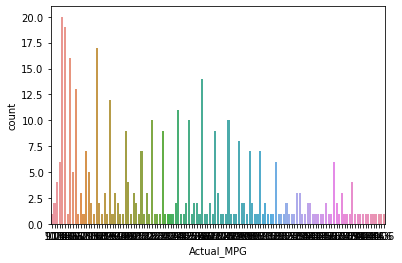

In [97]:
#distribution of classes in dependent variable
sns.countplot('Actual_MPG',data=data)

<AxesSubplot:xlabel='Actual_MPG', ylabel='count'>

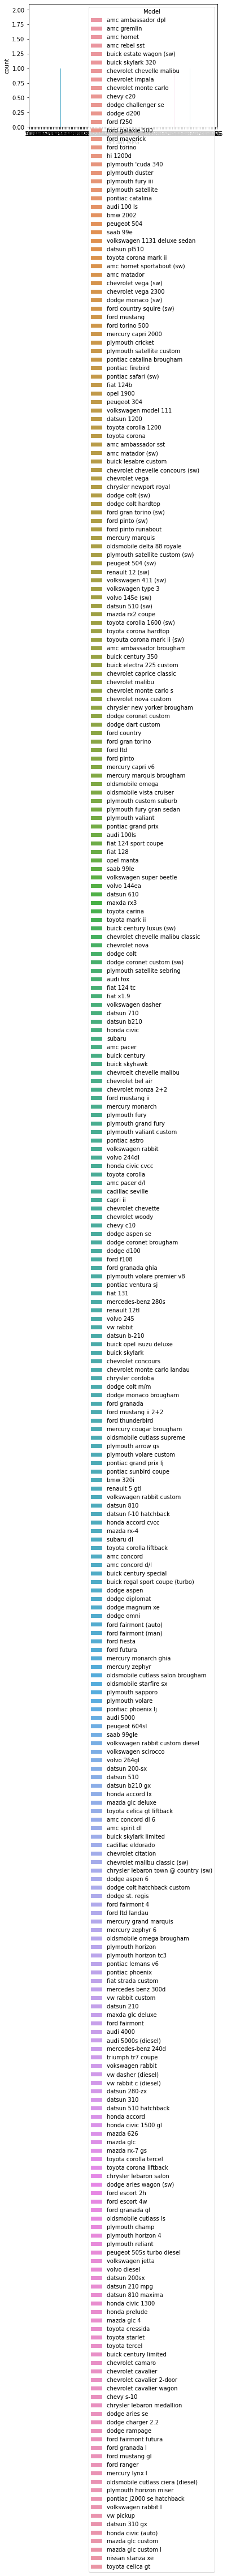

In [99]:
sns.countplot('Actual_MPG',data=data,hue='Model')